In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" alt="alt text" style="width:400px;height:350px;">

In [3]:
# Importing library
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras 

In [4]:
# Loading dataset
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
''' .reshape() fun shapes an array without changing the data of the array.
Using -1 in the reshape method of numpy tells the function to automatically 
calculate the dimension for that position based on the other dimensions and 
the total number of elements.
For example, if you have an array y_train and you use y_train.reshape(-1), 
it will flatten the array into a one-dimensional array.'''

y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
# List of classes in CIFAR-10 dataset

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

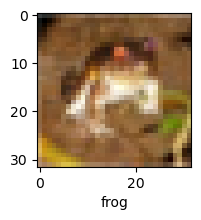

In [9]:
#ploting first image

#plt.imshow(x_train[0])

def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 0)

In [10]:
'''Here we'll do normalization, where the pixel values of images are scaled 
to a range between 0 and 1. In image data, pixel values typically range 
from 0 to 255 (for grayscale images), where 0 represents black 
and 255 represents white'''

x_train = x_train / 255  # Normalizing training data
x_test = x_test / 255  # Normalizing testing data


In [50]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # Flattening input layer
    keras.layers.Dense(3000, activation="relu"),  # Dense layer with ReLU activation
    keras.layers.Dense(1000, activation="relu"),  # Dense layer with ReLU activation
    keras.layers.Dense(10, activation="sigmoid")  # Output layer with sigmoid activation
])

# Compiling the model
ann.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Fitting the model on training data
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5


2024-05-18 01:19:57.353345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 19s 11ms/step - loss: 1.9592 - accuracy: 0.3053
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9879 - accuracy: 0.3154
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 2.7094 - accuracy: 0.2652
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 3.5538 - accuracy: 0.2471
Epoch 5/5
1563/1563 [==============================] - 21s 14ms/step - loss: 4.4413 - accuracy: 0.2368


In [51]:
ann.evaluate(x_test,y_test)

  1/313 [..............................] - ETA: 1:23 - loss: 4.4104 - accuracy: 0.2188

2024-05-18 01:22:10.791064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 6.3635 - accuracy: 0.2177


[6.363465785980225, 0.21770000457763672]

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

 29/313 [=>............................] - ETA: 1s

2024-05-18 01:22:20.572151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.23      0.35      0.28      1000
           1       0.18      0.53      0.26      1000
           2       0.00      0.00      0.00      1000
           3       0.24      0.04      0.08      1000
           4       0.09      0.03      0.05      1000
           5       0.22      0.40      0.28      1000
           6       0.35      0.14      0.20      1000
           7       0.20      0.35      0.25      1000
           8       0.33      0.31      0.32      1000
           9       0.24      0.00      0.01      1000

    accuracy                           0.22     10000
   macro avg       0.21      0.22      0.17     10000
weighted avg       0.21      0.22      0.17     10000



/Users/abhishek/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhishek/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhishek/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Our model perform very bad above, so to improve the performance we'll use the CNN.

For this will add convolution relu pooling layers.

It'll be like **Image data -> convolution -> relu -> pooling -> Dence NN**

**layers.Conv2D:** This adds a 2D convolutional layer to the model.(layer to detect the feature of Image )

**filters=32:** This specifies that the layer has 32 filters (also known as kernels). Each filter will detect different features in the input image.

**kernel_size=(3, 3):** This defines the size of each filter as 3x3 pixels.

**activation="relu":** This sets the activation function to ReLU (Rectified Linear Unit), which introduces non-linearity to the model and helps it learn complex patterns.

**input_shape=(32, 32, 3):** This specifies the shape of the input data to this layer. Here, each input image is 32x32 pixels with 3 color channels (RGB). This argument is only required for the first layer in the model, as subsequent layers can infer their input shape from the previous layer.

The main purpose of pooling is to reduce the size of feature maps.

![alt text](Screenshot-2019-07-21-at-2.57.13-AM.png)

In [22]:
cnn=models.Sequential([
    # Convolutional layers
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Flatten layer
    keras.layers.Flatten(),
    # Dense layers
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]              
              )

In [26]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [25]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10


2024-05-18 00:56:00.443164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.5181 - accuracy: 0.4517
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2684 - accuracy: 0.5607
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3588 - accuracy: 0.5587
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5832 - accuracy: 0.5462
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.1527 - accuracy: 0.5197
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 2.7378 - accuracy: 0.5086
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 3.3687 - accuracy: 0.5009
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 4.4175 - accuracy: 0.4861
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 6.0780 - accuracy: 0.4760
Epoch 10/10
1563/1563 [==============================] - 17s 11ms/step - lo

In [27]:
cnn.evaluate(x_test,y_test)

  1/313 [..............................] - ETA: 1:37 - loss: 8.7420 - accuracy: 0.4688

2024-05-18 00:59:13.848751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 13.1633 - accuracy: 0.4005


[13.163301467895508, 0.40049999952316284]

So after applying CNN our model's accuracy got doubled from 20 to 40

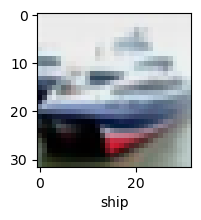

In [31]:
# Reshaping the y_test
y_test=y_test.reshape(-1,)
plot_sample(x_test,y_test,1)

In [32]:
# Predicting classes for testing data using CNN model
y_pred=cnn.predict(x_test)
y_pred[:5]

  2/313 [..............................] - ETA: 24s

2024-05-18 01:07:34.058345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


array([[2.09225313e-25, 3.76120107e-28, 1.12655414e-07, 1.57571981e-14,
        8.44943024e-20, 9.99999881e-01, 3.35611903e-14, 5.19368301e-27,
        1.58873478e-19, 0.00000000e+00],
       [4.30502369e-20, 1.07349031e-07, 0.00000000e+00, 0.00000000e+00,
        6.19962691e-38, 3.73945646e-35, 0.00000000e+00, 0.00000000e+00,
        9.99999881e-01, 6.69290049e-21],
       [8.61800320e-09, 9.23227361e-08, 8.37264704e-21, 1.07635544e-24,
        1.98821376e-15, 8.19420691e-08, 4.15630919e-18, 5.94755434e-18,
        9.99999881e-01, 1.63858947e-14],
       [1.46835635e-04, 1.66795695e-13, 5.53553277e-14, 2.24302046e-33,
        3.91353269e-12, 1.15681270e-10, 1.51596693e-19, 7.04848954e-24,
        9.99853134e-01, 1.02304628e-27],
       [1.33888986e-26, 1.06689309e-28, 4.33150803e-13, 1.60170158e-11,
        9.99930501e-01, 5.90479540e-05, 1.05206900e-05, 2.27824482e-15,
        4.93211186e-22, 0.00000000e+00]], dtype=float32)

[[2.09225313e-25, 3.76120107e-28, 1.12655414e-07, 1.57571981e-14,
        8.44943024e-20, 9.99999881e-01, 3.35611903e-14, 5.19368301e-27,
        1.58873478e-19, 0.00000000e+00],
 
 This is the prediction of our first image, & value in each of these elements is Probability distribution b/w 0 & 1 as we used softmax.

 This find which element is MAX, we'll use argmax fucntion, which give the index of max value

In [33]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 8, 4]

This is our prediction

In [35]:
# True lable
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

So 2nd & 3rd are correct predcition

#### Checking With Image

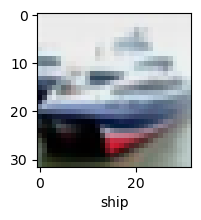

In [47]:
plot_sample(x_test,y_test,1)

In [46]:
classes[y_classes[1]]

'ship'

In [49]:
print("classification_report: \n", classification_report(y_test,y_classes))

classification_report: 
               precision    recall  f1-score   support

           0       0.71      0.32      0.44      1000
           1       0.60      0.56      0.58      1000
           2       0.35      0.18      0.24      1000
           3       0.49      0.02      0.05      1000
           4       0.39      0.48      0.43      1000
           5       0.23      0.83      0.36      1000
           6       0.62      0.41      0.50      1000
           7       0.54      0.39      0.45      1000
           8       0.44      0.76      0.56      1000
           9       0.85      0.05      0.09      1000

    accuracy                           0.40     10000
   macro avg       0.52      0.40      0.37     10000
weighted avg       0.52      0.40      0.37     10000

